# Word2Vec

In [68]:
import os
import numpy as np
import json

import nltk
nltk.download('punkt')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')  + ['shh', 'hoo', 'boo', 'uhoh', 'aah', 'heh', 'huh', 'ooh', 'yo', 'uh', 'um', 'aaah']

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

from collections import Counter
import spacy.cli
spacy.cli.download('en')
import spacy
nlp = spacy.load('en')

from matplotlib import pyplot as plt

[nltk_data] Downloading package punkt to /home/angelo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/angelo/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/home/angelo/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [69]:
path = "/home/angelo/Desktop/master_offline/progettone_github/Animation-studios-analysis/sottotitoli/clean_subtitles/Disney/Animation/"

all_text = []
for r, d, files in os.walk(path):
    for f in files:
        filename = r+'/'+f
        with open(filename, 'r', encoding ='utf-8', errors='ignore') as fh:
            text = fh.read()
            all_text.append(text)
len(all_text)

88

In [70]:
one_document = ' '.join(all_text).lower()
one_document = one_document.replace('\n', ' ')

# Spacy sentences splitting

In [71]:
def tokenize_sents(text):
    text_split = []
    tmp_text = text
    while len(tmp_text) > 1000000:
        split_pos = tmp_text.find('.', 900000)
        text_split.append(tmp_text[:split_pos+1])
        tmp_text = tmp_text[split_pos+1:]

    text_split.append(tmp_text)
    
    sentences = []
    for t in text_split:
        print(len(t))
        doc = nlp(t) 
        sentences = sentences + [s.text for s in doc.sents]
        
    return sentences  

spacy_sentences = tokenize_sents(one_document)

900029
900018
900028
501026


In [72]:
len(spacy_sentences)

126021

In [85]:
spacy_sentences[0]

'long ago, in the faraway land of ancient greece, there was a golden age of powerful gods and extraordinary heroes.'

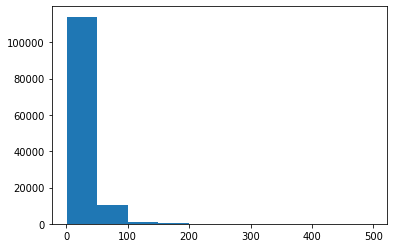

In [78]:
plt.hist([len(s) for s in spacy_sentences])
plt.show()

In [89]:
counter = Counter([len(s) for s in spacy_sentences])
sorted_counter = sorted(counter.items(), reverse=1)[:10]
sorted_counter

[(497, 1),
 (482, 1),
 (434, 1),
 (396, 1),
 (390, 1),
 (368, 1),
 (318, 1),
 (315, 2),
 (297, 1),
 (294, 1)]

In [90]:
for s in spacy_sentences:
    if len(s) == sorted_counter[0][0]:
        print(s)

oh, the world will sing of an english king a thousand years from now and not because he passed some laws or had that lofty brow while bonny good king richard leads the great crusade he's on we'll all have to slave away for that goodfornothin'john incredible as he is inept whenever the history books are kept they'll call him the phoney king of england a pox on the phoney king of england he sits alone on a giant throne pretendin'he's the king a little tyke who's rather like a puppet on a string


# NLTK sentences splitting

In [74]:
nltk_sentences = sent_tokenize(one_document)

In [75]:
len(nltk_sentences)

111766

In [86]:
nltk_sentences[0]

'long ago, in the faraway land of ancient greece, there was a golden age of powerful gods and extraordinary heroes.'

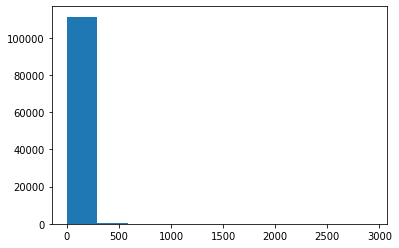

In [77]:
plt.hist([len(s) for s in nltk_sentences])
plt.show()

In [91]:
counter = Counter([len(s) for s in nltk_sentences])
sorted_counter = sorted(counter.items(), reverse=1)[:10]
sorted_counter

[(2923, 1),
 (2742, 1),
 (2003, 1),
 (1837, 1),
 (1756, 1),
 (1726, 1),
 (1725, 1),
 (1668, 1),
 (1593, 1),
 (1588, 1)]

In [92]:
for s in nltk_sentences:
    if len(s) == sorted_counter[0][0]:
        print(s)

on that littlepatch of heaven  way out west  come with me  let's go wander  far beyondthe wild blue yonder  out where stars roam free  though the journey'sfar from breezy  stick with me,i'll make it easy  you can depend on me  yeah, there'sa long road before us  and it's a hard road,indeed  but, darlin', i swear  i'll get us there  whereverthe trail may lead  once we crossthat far horizon  lifeis bound to be surprisin'  but we'll take itday by day  never mindthe wind and weather  if we walk that trailtogether  somehow we'll find our way  yeah, there's a long roadbefore us  and it's a hard road,indeed  but, darlin', i vow  we'll get through somehow  whereverthe trail may lead  can't tell youwhen we'll be there  it may take all our lives  we're headed forthat great unknown  we'll soon be walking freethere  till that day arrives  at least we won't betravelin' alone  and there'sa long road before us  and it's a hard road,indeed  but, darlin', don't fear  'cause i'll be right here  to give 

# Sentences tokenization

In [127]:
tok_sents = [[word for word in word_tokenize(sentence) if (word.isalpha())] for sentence in spacy_sentences]

# WORD2VEC

In [128]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(tok_sents, size=100, window=10, min_count=15, sg=0, iter=20, negative=10)

In [129]:
#learned vocabulary
words = list(w2v_model.wv.vocab)
len(words)

2724

In [130]:
w2v_model.wv.most_similar(['cinderella'])

[('ew', 0.5396286845207214),
 ('hunting', 0.5264935493469238),
 ('written', 0.5156134963035583),
 ('ingonyama', 0.5088129639625549),
 ('shining', 0.5082613825798035),
 ('guilty', 0.4948311746120453),
 ('style', 0.49395573139190674),
 ('tales', 0.4845755398273468),
 ('lily', 0.48369863629341125),
 ('scary', 0.4798201322555542)]

In [131]:
w2v_model.wv.most_similar(['king', 'princess'], ['prince'])

[('hail', 0.6090978980064392),
 ('queen', 0.5984297394752502),
 ('aurora', 0.5797644257545471),
 ('gods', 0.5466465353965759),
 ('gift', 0.5256491303443909),
 ('kingdom', 0.4888436198234558),
 ('england', 0.48561951518058777),
 ('beloved', 0.48546746373176575),
 ('event', 0.48431873321533203),
 ('arendelle', 0.4765511453151703)]

In [132]:
w2v_model.wv.similarity('king', 'majesty')

0.41220662

# Similarity matrix

In [133]:
voc = set(w2v_model.wv.vocab)
len(voc)

2724

In [134]:
voc = voc.difference(en_stopwords)
voc = set([w for w in voc if len(w) > 2])
len(voc)

2543

In [149]:
# from set to list in order to be usre about the order during the following iterations
voc = list(sorted(voc))

In [151]:
indici = dict()
for index, key in enumerate(voc):
    if key not in indici:
        indici[key] = index
        
reverse_indici = dict()
for term, termID in indici.items():
    reverse_indici[termID] = term

In [152]:
#costruzione matrice
graph_matrix = np.zeros(shape=(len(voc), len(voc)), dtype=np.float32)

for index1, key1 in enumerate(voc):
    for index2, key2 in enumerate(voc):
        graph_matrix[index1 ][index2] = w2v_model.wv.similarity(key1, key2)
        
len(graph_matrix)

2543

# Similarity graph

In [153]:
#constructing the list of tuples
graph_list = []
nodes = set()
for x in range(len(graph_matrix)):
    for y in range(x+1, len(graph_matrix)):
        if graph_matrix[x][y] >= 0.70:
            nodes |= set([reverse_indici[x], reverse_indici[y]])
            graph_list.append((reverse_indici[x],reverse_indici[y],graph_matrix[x][y]))      
print('nodes:', len(nodes))
print('links:', len(graph_list))

nodes: 314
links: 434


In [154]:
graph = dict()
graph["nodes"] = [{"id": t} for t in nodes]
graph["links"] = [{"source":t[0], "target":t[1], "value":float(t[2])} for t in graph_list]
with open('data.json', 'w') as outfile:
    json.dump(graph, outfile)